# Addition of a node such that the Hypergraph is k-uniform.

In [87]:
import numpy as np
import xgi

In [88]:
hyperedge_dict = {'a': [0,1,2], 'b': [1,4,5], 'c': [1,3], 'd': [3,4]}

In [89]:
H = xgi.Hypergraph(hyperedge_dict)
print(f"The hypergraph has {H.nodes} nodes and {H.edges} edges")

The hypergraph has [0, 1, 2, 4, 5, 3] nodes and ['a', 'b', 'c', 'd'] edges


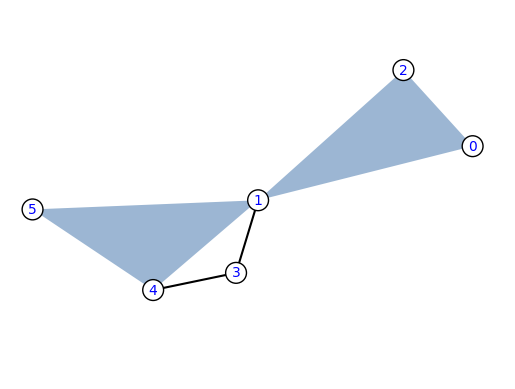

In [90]:
xgi.draw(H, node_labels=True, font_color_nodes="blue")


In [91]:
hyperdim = {edge: len(nodes) for edge, nodes in h_dict.items()}
hyperdim

{'a': 3, 'b': 3, 'c': 2, 'd': 2}

In [92]:
import copy

In [93]:
def uniformize(H, m=None):
    '''
    From  a Hypergraph H, make it uniform adding an artificial node connected in such a way
    that all hyperedges are of the same (maximum) dimension m.
    '''

    Hextra = copy.copy(H)

    # Find hyperedge dimensions dict
    h_dict = Hextra.edges.members(dtype=dict)
    hyperdim = {edge: len(edgenodes) for edge, edgenodes in h_dict.items()}

    # Find maximum hyperedge dimension
    if not m:
        m = max(hyperdim.values())
    else:
        assert isinstance(m, int) and m >= max(hyperdim.values())

    # Add a node to each edge which needs it
    for edge in Hextra.edges:

        # Count how many nodes the edge will need
        needed = m - hyperdim[edge]

        # Add the number needed as an attribute, and then add it.
        Hextra.edges[edge]['extra'] = needed
        if needed > 0:
            Hextra.add_node_to_edge(edge, '*')

    return Hextra

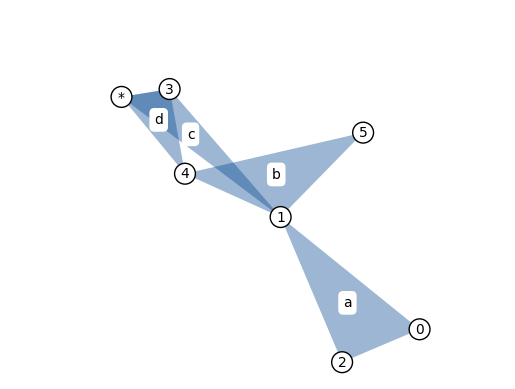

In [104]:
Hextra = uniformize(H)
xgi.draw(Hextra, node_labels=True, hyperedge_labels=True)